In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
from matplotlib import colorbar
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

np.random_state = 42

In [2]:
!gdown 1BrMm1Cg5ZMb4eRDTnRb2MZNept0QP682

Downloading...
From: https://drive.google.com/uc?id=1BrMm1Cg5ZMb4eRDTnRb2MZNept0QP682
To: /content/sd_listings.csv
100% 50.9M/50.9M [00:01<00:00, 28.7MB/s]


### Load In Dataset

In [3]:
sd_listings = pd.read_csv('sd_listings.csv', index_col= 0)
sd_listings.head(3)

,id,listing_url,latitude,longitude,zipcode,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_id,host_url,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,33159143,https://www.airbnb.com/rooms/33159143,32.91736,-117.07635,92131.0,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,249661563.0,https://www.airbnb.com/users/show/249661563,3/18/19,Retired businessman of 30 years in this commun...,within a few hours,100.0,0.0,Scripps Ranch,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
1,17138468,https://www.airbnb.com/rooms/17138468,32.84067,-117.27443,92037.0,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,NaN,NaN,1.0,0.0,30.0,1125.0,79755951.0,https://www.airbnb.com/users/show/79755951,6/24/16,Quiet and considerate.,NaN,0.0,0.0,La Jolla,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
2,21898446,https://www.airbnb.com/rooms/21898446,32.79797,-117.2425,92109.0,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,NaN,NaN,1.0,0.0,30.0,30.0,159773487.0,https://www.airbnb.com/users/show/159773487,11/22/17,NaN,NaN,0.0,0.0,Pacific Beach,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,flexible,0.0,0.0


### Select columns for modeling

In [4]:
sd_listings.columns

Index(['id', 'listing_url', 'latitude', 'longitude', 'zipcode', 'name',
       'summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'nightly_price', 'price_per_stay',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'host_id', 'host_url', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'neighbourhood_cleansed',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'number_of_reviews', 'number_of_stays',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license',

In [5]:
modeling_cols = ['id', 'listing_url', 'latitude', 'longitude', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type', 'accommodates', 
               'bathrooms', 'bedrooms', 'beds',
               'bed_type','nightly_price', 'price_per_stay',
               'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
               'minimum_nights', 'maximum_nights','host_response_time', 'host_response_rate',
               'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic',
               'host_identity_verified', 'number_of_reviews', 'number_of_stays',
               'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'requires_license', 'instant_bookable',
               'is_business_travel_ready', 'cancellation_policy',
               'require_guest_profile_picture', 'require_guest_phone_verification']

In [6]:
sd_modeling = sd_listings[modeling_cols]
sd_modeling.tail(2)

,id,listing_url,latitude,longitude,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
13049,17975942,https://www.airbnb.com/rooms/17975942,32.83598,-117.27878,La Jolla,92037.0,House,Entire home/apt,21,5.5,7.0,13.0,Real Bed,1305.0,1305.0,1000.0,800.0,21.0,0.0,1.0,1125.0,within an hour,99.0,0.0,403.0,1.0,0.0,4.0,8.0,80.0,9.0,8.0,10.0,8.0,10.0,9.0,0.0,1.0,0.0,super_strict_60,0.0,0.0
13050,33160513,https://www.airbnb.com/rooms/33160513,32.74357,-117.17679,Midtown,92103.0,Condominium,Entire home/apt,24,8.0,8.0,10.0,Real Bed,398.0,398.0,500.0,499.0,24.0,0.0,1.0,365.0,within an hour,100.0,1.0,123.0,1.0,0.0,1.0,2.0,80.0,10.0,10.0,6.0,10.0,10.0,8.0,0.0,1.0,0.0,super_strict_60,0.0,0.0


### Handle remaining missing values

In [7]:
# check missing
sd_modeling.isna().sum()

id                                     0
listing_url                            0
latitude                               0
longitude                              0
neighbourhood_cleansed                 2
zipcode                                0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              3
bedrooms                               3
beds                                   9
bed_type                               0
nightly_price                          1
price_per_stay                         1
security_deposit                    2675
cleaning_fee                        1505
guests_included                        1
extra_people                           1
minimum_nights                         1
maximum_nights                         1
host_response_time                  2146
host_response_rate                     2
host_is_superhost                      2
host_total_listi

### Imputing missing beds

In [8]:
# fill missing beds with values in bedrooms
sd_modeling['beds'] = sd_modeling['beds'].fillna(sd_modeling['bedrooms'])

### Fill in missing security_deposit, cleaning_fee with 0's

In [9]:
sd_modeling[['security_deposit', 'cleaning_fee']] = sd_modeling[['security_deposit', 'cleaning_fee']].fillna(0)

### Impute missing values in host_response_time

In [10]:
# assign a new value 'no response' for the missing values
sd_modeling['host_response_time'] = sd_modeling['host_response_time'].fillna('no response')

In [11]:
sd_modeling['host_response_time'].value_counts()

within an hour        8410
no response           2146
within a few hours    1587
within a day           762
a few days or more     147
Name: host_response_time, dtype: int64

Drop remaining rows with missing values

ie. Values that cannot be imputed because of nature of the feature

In [12]:
# Drop rows that has NaN values on selected columns
sd_modeling = sd_modeling.dropna()

In [13]:
sd_modeling.isna().sum()

id                                  0
listing_url                         0
latitude                            0
longitude                           0
neighbourhood_cleansed              0
zipcode                             0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
nightly_price                       0
price_per_stay                      0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
host_total_listings_count           0
host_has_profile_pic                0
host_identit

### Check of data-types after cleaning

In [14]:
# convert to appropriate datatype
sd_modeling['bedrooms'] = sd_modeling['bedrooms'].astype(float)
sd_modeling['zipcode'] = sd_modeling['zipcode'].astype(int)
sd_modeling['latitude'] = sd_modeling['latitude'].astype(float)
sd_modeling['longitude'] = sd_modeling['longitude'].astype(float)
sd_modeling['beds'] = sd_modeling['beds'].astype(float).astype(int)
sd_modeling['id'] = sd_modeling['id'].astype(int)

In [15]:
sd_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13039 entries, 0 to 13050
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13039 non-null  int64  
 1   listing_url                       13039 non-null  object 
 2   latitude                          13039 non-null  float64
 3   longitude                         13039 non-null  float64
 4   neighbourhood_cleansed            13039 non-null  object 
 5   zipcode                           13039 non-null  int64  
 6   property_type                     13039 non-null  object 
 7   room_type                         13039 non-null  object 
 8   accommodates                      13039 non-null  int64  
 9   bathrooms                         13039 non-null  float64
 10  bedrooms                          13039 non-null  float64
 11  beds                              13039 non-null  int64  
 12  bed_type 

In [16]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [17]:
# save as csv
path = "data/"

sd_modeling.to_csv(path + 'sd_modeling_with_urls.csv')

In [18]:
sd_modeling = sd_modeling.drop(columns = 'listing_url')
sd_modeling.head()

,id,latitude,longitude,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,33159143,32.91736,-117.07635,Scripps Ranch,92131,House,Private room,1,1.0,1.0,1,Real Bed,1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,within a few hours,100.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
1,17138468,32.84067,-117.27443,La Jolla,92037,Apartment,Entire home/apt,1,2.0,2.0,3,Real Bed,1400.0,1400.0,0.0,0.0,1.0,0.0,30.0,1125.0,no response,0.0,0.0,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
2,21898446,32.79797,-117.24250,Pacific Beach,92109,Townhouse,Private room,1,1.0,1.0,1,Real Bed,1250.0,1250.0,0.0,0.0,1.0,0.0,30.0,30.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,flexible,0.0,0.0
3,25948680,32.77545,-117.05923,College Area,92120,Apartment,Entire home/apt,1,1.0,1.0,1,Real Bed,1150.0,1150.0,0.0,0.0,1.0,0.0,31.0,40.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,flexible,0.0,0.0
4,1756516,32.84619,-117.27558,La Jolla,92037,Condominium,Private room,1,1.0,1.0,1,Real Bed,110.0,110.0,200.0,0.0,1.0,50.0,180.0,365.0,within a day,67.0,0.0,6.0,1.0,1.0,2.0,4.0,90.0,7.0,7.0,8.0,8.0,9.0,10.0,0.0,0.0,0.0,strict_14_with_grace_period,0.0,0.0


In [19]:
# save as csv
path = "data/"

sd_modeling.to_csv(path + 'sd_modeling_cleaned.csv')

### Exploring Categorical Features

### Checking value counts for each categorical feature

In [20]:
cat_cols = sd_modeling.select_dtypes(include = ['object']).columns
cat_cols

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
       'host_response_time', 'cancellation_policy'],
      dtype='object')

In [21]:
for col in cat_cols:
    values = sd_modeling[col].value_counts()
    print(values, "\n")

Mission Bay        1589
Pacific Beach      1040
La Jolla            845
East Village        821
North Hills         737
                   ... 
Yosemite Dr           3
Horton Plaza          3
Eastlake Woods        2
Eastlake Trails       1
Thomy Locust Pl       1
Name: neighbourhood_cleansed, Length: 103, dtype: int64 

House                     4569
Apartment                 3391
Condominium               1990
Townhouse                  713
Guesthouse                 481
Guest suite                470
Bungalow                   298
Cottage                    289
Loft                       259
Villa                       88
Serviced apartment          83
Hostel                      72
Camper/RV                   57
Bed and breakfast           48
Other                       39
Resort                      35
Boat                        35
Tiny house                  29
Boutique hotel              26
Hotel                       15
Aparthotel                  12
Tent                       

### Preprocessing Features

**Categorical features**

In [22]:
cat_cols

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
       'host_response_time', 'cancellation_policy'],
      dtype='object')

In [23]:
# first convert zipcode to a dtype object for OHE
sd_modeling['zipcode'] = sd_modeling['zipcode'].astype(object)

### Establish order of ordinal columns

In [24]:
# convert to categorical dtype
sd_modeling['host_response_time'] = sd_modeling['host_response_time'].astype('category')
sd_modeling['cancellation_policy'] = sd_modeling['cancellation_policy'].astype('category')

In [25]:
# define order of the ordinal features
response_time_list = ['within an hour',
                      'within a few hours', 
                      'within a day', 
                      'a few days or more', 
                      'no response']

cancellation_policy_list = ['flexible',
                            'moderate',
                            'strict',
                            'strict_14_with_grace_period', 
                            'super_strict_60', 
                            'super_strict_30',
                            'luxury_moderate']

In [26]:
# define nominal and ordinal features in the categorical columns
nom_cols = sd_modeling.select_dtypes(['object']).columns
print(nom_cols)
ordinal_cols = sd_modeling.select_dtypes(['category']).columns
print(ordinal_cols)

Index(['neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
       'bed_type'],
      dtype='object')
Index(['host_response_time', 'cancellation_policy'], dtype='object')


### Building pipeline transformer

In [27]:
# define numeric transformation pipeline that scales the numbers
numeric_pipeline = Pipeline([('numnorm', StandardScaler())]) 

# define an ordinal transformation pipeline that ordinal encodes the cats
ordinal_pipeline = Pipeline([('ordinalenc', OrdinalEncoder(categories = [response_time_list, 
                                                                         cancellation_policy_list]))])

# define a nominal transformation pipeline that OHE the cats
nominal_pipeline = Pipeline([('onehotenc', OneHotEncoder(categories= "auto", 
                                                         sparse = False, 
                                                         handle_unknown = 'ignore'))]) 

In [28]:
sd_trans = sd_modeling.drop(columns = ['id', 'latitude', 'longitude'])
sd_trans = sd_trans.reset_index(drop = 'index')
sd_trans.head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Scripps Ranch,92131,House,Private room,1,1.0,1.0,1,Real Bed,1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,within a few hours,100.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
1,La Jolla,92037,Apartment,Entire home/apt,1,2.0,2.0,3,Real Bed,1400.0,1400.0,0.0,0.0,1.0,0.0,30.0,1125.0,no response,0.0,0.0,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
2,Pacific Beach,92109,Townhouse,Private room,1,1.0,1.0,1,Real Bed,1250.0,1250.0,0.0,0.0,1.0,0.0,30.0,30.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,flexible,0.0,0.0
3,College Area,92120,Apartment,Entire home/apt,1,1.0,1.0,1,Real Bed,1150.0,1150.0,0.0,0.0,1.0,0.0,31.0,40.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,flexible,0.0,0.0
4,La Jolla,92037,Condominium,Private room,1,1.0,1.0,1,Real Bed,110.0,110.0,200.0,0.0,1.0,50.0,180.0,365.0,within a day,67.0,0.0,6.0,1.0,1.0,2.0,4.0,90.0,7.0,7.0,8.0,8.0,9.0,10.0,0.0,0.0,0.0,strict_14_with_grace_period,0.0,0.0


In [29]:
# construct column transformer for the selected columns with pipelines
ct = ColumnTransformer(transformers = [("nominalpipe", nominal_pipeline, ['neighbourhood_cleansed',
                                                                            'zipcode', 'property_type', 
                                                                            'room_type','bed_type']),
                                       ("ordinalpipe", ordinal_pipeline, ['host_response_time', 
                                                                          'cancellation_policy']),
                                       ("numericpipe", numeric_pipeline, sd_trans.select_dtypes(['int', 'float']).columns)])

### Reorder dataframe for simplicity of feature name retrieval

In [30]:
sd_trans = sd_trans[ # nominal below this line
                    ['neighbourhood_cleansed','zipcode', 'property_type', 'room_type','bed_type',
                     # ordinal below this line
                     'host_response_time', 'cancellation_policy', 
                     # remaining numeric
                     'accommodates', 'bathrooms', 'bedrooms', 'beds','nightly_price', 'price_per_stay', 
                     'security_deposit', 'cleaning_fee','guests_included', 'extra_people', 'minimum_nights', 
                     'maximum_nights', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count', 
                     'host_has_profile_pic','host_identity_verified', 'number_of_reviews', 'number_of_stays', 'review_scores_rating', 
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'requires_license', 'instant_bookable', 'is_business_travel_ready',
                     'require_guest_profile_picture', 'require_guest_phone_verification']]

In [31]:
sd_trans.head()

,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,host_response_time,cancellation_policy,accommodates,bathrooms,bedrooms,beds,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,Scripps Ranch,92131,House,Private room,Real Bed,within a few hours,strict_14_with_grace_period,1,1.0,1.0,1,1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,100.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0
1,La Jolla,92037,Apartment,Entire home/apt,Real Bed,no response,strict_14_with_grace_period,1,2.0,2.0,3,1400.0,1400.0,0.0,0.0,1.0,0.0,30.0,1125.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0
2,Pacific Beach,92109,Townhouse,Private room,Real Bed,no response,flexible,1,1.0,1.0,1,1250.0,1250.0,0.0,0.0,1.0,0.0,30.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0
3,College Area,92120,Apartment,Entire home/apt,Real Bed,no response,flexible,1,1.0,1.0,1,1150.0,1150.0,0.0,0.0,1.0,0.0,31.0,40.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
4,La Jolla,92037,Condominium,Private room,Real Bed,within a day,strict_14_with_grace_period,1,1.0,1.0,1,110.0,110.0,200.0,0.0,1.0,50.0,180.0,365.0,67.0,0.0,6.0,1.0,1.0,2.0,4.0,90.0,7.0,7.0,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0


In [32]:
sd_trans.shape

(13039, 38)

### Transforming

In [33]:
sd_pp = pd.DataFrame(ct.fit_transform(sd_trans))

In [34]:
sd_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,-1.152181,-0.561263,-0.534033,-0.728248,2.546108,0.605540,1.504754,-0.909516,-0.562984,-0.490416,3.516369,-0.408425,0.513223,-0.764034,-0.238620,0.038201,-0.972836,-0.581030,-0.581030,0.372804,0.368466,0.464525,0.272019,0.278668,0.342562,0.598182,0.0,0.970300,0.0,-0.16778,-0.183109
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,-1.152181,0.543637,0.302897,0.323957,3.417825,0.925199,-0.555421,-0.909516,-0.562984,-0.490416,1.607093,0.389161,-2.165526,-0.764034,-0.238620,0.038201,-0.972836,-0.547715,-0.547715,0.683043,0.368466,0.464525,0.272019,0.278668,0.342562,0.598182,0.0,0.970300,0.0,-0.16778,-0.183109
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,-1.152181,-0.561263,-0.534033,-0.728248,2.981967,0.765369,-0.555421,-0.

### Get Feature Names and Assign to sd_pp

In [35]:
# get nominal values
nominal_features = list(nominal_pipeline.named_steps['onehotenc'].fit(sd_trans[nom_cols]).get_feature_names())

In [36]:
nominal_features[0:5]

['x0_Allied Gardens',
 'x0_Alta Vista',
 'x0_Amphitheater And Water Park',
 'x0_Balboa Park',
 'x0_Bario Logan']

### Cleaning feature names

In [37]:
ordinal_list = list(ordinal_cols)
ordinal_list 

['host_response_time', 'cancellation_policy']

In [38]:
numeric_list = ['accommodates', 'bathrooms', 'bedrooms', 'beds','nightly_price', 'price_per_stay', 
                     'security_deposit', 'cleaning_fee','guests_included', 'extra_people', 'minimum_nights', 
                     'maximum_nights', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count', 
                     'host_has_profile_pic','host_identity_verified', 'number_of_reviews', 'number_of_stays', 'review_scores_rating', 
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'requires_license', 'instant_bookable', 'is_business_travel_ready',
                     'require_guest_profile_picture', 'require_guest_phone_verification']
len(numeric_list)

31

In [39]:
features_to_clean = ['x0_Allied Gardens', 'x0_Alta Vista', 'x0_Amphitheater And Water Park', 'x0_Balboa Park',
                   'x0_Bario Logan', 'x0_Bay Ho', 'x0_Bay Park', 'x0_Bay Terrace', 'x0_Bird Land',
                   'x0_Bonita Long Canyon', 'x0_Carmel Mountain', 'x0_Carmel Valley', 'x0_Chollas View',
                   'x0_City Heights East', 'x0_City Heights West', 'x0_Clairemont Mesa', 'x0_College Area',
                   'x0_Columbia', 'x0_Core', 'x0_Cortez Hill', 'x0_Darnall', 'x0_Del Cerro',
                   'x0_Del Mar Heights', 'x0_East Lake', 'x0_East Village', 'x0_Eastlake Trails',
                   'x0_Eastlake Vistas', 'x0_Eastlake Woods', 'x0_Egger Highlands', 'x0_El Cerritos',
                   'x0_Emerald Hills', 'x0_Encanto', 'x0_Estlake Greens', 'x0_Gaslamp Quarter', 'x0_Gateway',
                   'x0_Grant Hill', 'x0_Grantville', 'x0_Horton Plaza', 'x0_Jomacha-Lomita', 'x0_Kearny Mesa',
                   'x0_Kensington', 'x0_La Jolla', 'x0_La Jolla Village', 'x0_Lake Murray', 'x0_Lincoln Park',
                   'x0_Linda Vista', 'x0_Little Italy', 'x0_Loma Portal', 'x0_Lynwood Hills', 'x0_Marina',
                   'x0_Memorial', 'x0_Midtown', 'x0_Midtown District', 'x0_Mira Mesa', 'x0_Mission Bay',
                   'x0_Mission Valley', 'x0_Moreno Mission', 'x0_Mount Hope', 'x0_Mountain View', 'x0_Nestor',
                   'x0_Normal Heights', 'x0_North City', 'x0_North Clairemont', 'x0_North Hills',
                   'x0_Northwest', 'x0_Oak Park', 'x0_Ocean Beach', 'x0_Old Town', 'x0_Otay Ranch',
                   'x0_Pacific Beach', 'x0_Palm City', 'x0_Paradise Hills', 'x0_Park West',
                   'x0_Paseo Ranchoero', 'x0_Rancho Bernadino', 'x0_Rancho Del Rey', 'x0_Rancho Penasquitos',
                   'x0_Rolando', 'x0_Rolling Hills Ranch', 'x0_Roseville', 'x0_Sabre Springs', 'x0_San Carlos',
                   'x0_San Ysidro', 'x0_Scripps Ranch', 'x0_Serra Mesa', 'x0_Sky Line', 'x0_Sorrento Valley',
                   'x0_South Park', 'x0_Southcrest', 'x0_Southwest', 'x0_Sunbow', 'x0_Talmadge',
                   'x0_Terra Nova', 'x0_Thomy Locust Pl', 'x0_Tierrasanta', 'x0_Tijuana River Valley',
                   'x0_Torrey Pines', 'x0_University City', 'x0_Valencia Park', 'x0_Webster',
                   'x0_West University Heights', 'x0_Wooded Area', 'x0_Yosemite Dr', 'x1_22000', 'x1_22010',
                   'x1_22425', 'x1_22435', 'x1_91901', 'x1_91902', 'x1_91910', 'x1_91911', 'x1_91913',
                   'x1_91914', 'x1_91915', 'x1_91932', 'x1_91941', 'x1_91942', 'x1_91945', 'x1_91950',
                   'x1_92014', 'x1_92025', 'x1_92029', 'x1_92037', 'x1_92054', 'x1_92064', 'x1_92071',
                   'x1_92075', 'x1_92101', 'x1_92102', 'x1_92103', 'x1_92104', 'x1_92105', 'x1_92106',
                   'x1_92107', 'x1_92108', 'x1_92109', 'x1_92110', 'x1_92111', 'x1_92113', 'x1_92114',
                   'x1_92115', 'x1_92116', 'x1_92117', 'x1_92118', 'x1_92119', 'x1_92120', 'x1_92121',
                   'x1_92122', 'x1_92123', 'x1_92124', 'x1_92126', 'x1_92127', 'x1_92128', 'x1_92129',
                   'x1_92130', 'x1_92131', 'x1_92139', 'x1_92154', 'x1_92173', 'x1_92307', 'x1_92618',
                   'x1_921096', 'x2_Aparthotel', 'x2_Apartment', 'x2_Barn', 'x2_Bed and breakfast', 'x2_Boat',
                   'x2_Boutique hotel', 'x2_Bungalow', 'x2_Bus', 'x2_Cabin', 'x2_Camper/RV', 'x2_Campsite',
                   'x2_Casa particular (Cuba)', 'x2_Castle', 'x2_Cave', 'x2_Chalet', 'x2_Condominium',
                   'x2_Cottage', 'x2_Dome house', 'x2_Earth house', 'x2_Farm stay', 'x2_Guest suite',
                   'x2_Guesthouse', 'x2_Hostel', 'x2_Hotel', 'x2_House', 'x2_Igloo', 'x2_Loft',
                   'x2_Nature lodge', 'x2_Other', 'x2_Resort', 'x2_Serviced apartment', 'x2_Tent',
                   'x2_Tiny house', 'x2_Townhouse', 'x2_Treehouse', 'x2_Vacation home', 'x2_Villa',
                   'x3_Entire home/apt', 'x3_Private room', 'x3_Shared room', 'x4_Airbed', 'x4_Couch',
                   'x4_Futon', 'x4_Pull-out Sofa', 'x4_Real Bed']

In [40]:
# removes the OHE strings at front end of feature names
def clean_features(lst):
    new_list = []
    for value in lst:
        splitted = value.split('_')[1] # returns name of feature after '_'
        new_list.append(splitted)
        continue
    return new_list

In [41]:
cleaned_features = clean_features(features_to_clean)

In [42]:
sd_pp.columns = cleaned_features + ordinal_list + numeric_list
sd_pp

,Allied Gardens,Alta Vista,Amphitheater And Water Park,Balboa Park,Bario Logan,Bay Ho,Bay Park,Bay Terrace,Bird Land,Bonita Long Canyon,Carmel Mountain,Carmel Valley,Chollas View,City Heights East,City Heights West,Clairemont Mesa,College Area,Columbia,Core,Cortez Hill,Darnall,Del Cerro,Del Mar Heights,East Lake,East Village,Eastlake Trails,Eastlake Vistas,Eastlake Woods,Egger Highlands,El Cerritos,Emerald Hills,Encanto,Estlake Greens,Gaslamp Quarter,Gateway,Grant Hill,Grantville,Horton Plaza,Jomacha-Lomita,Kearny Mesa,Kensington,La Jolla,La Jolla Village,Lake Murray,Lincoln Park,Linda Vista,Little Italy,Loma Portal,Lynwood Hills,Marina,Memorial,Midtown,Midtown District,Mira Mesa,Mission Bay,Mission Valley,Moreno Mission,Mount Hope,Mountain View,Nestor,Normal Heights,North City,North Clairemont,North Hills,Northwest,Oak Park,Ocean Beach,Old Town,Otay Ranch,Pacific Beach,Palm City,Paradise Hills,Park West,Paseo Ranchoero,Rancho Bernadino,Rancho Del Rey,Rancho Penasquitos,Rolando,Rolling Hills Ranch,Roseville,Sabre Springs,San Carlos,San Ysidro,Scripps Ranch,Serra Mesa,Sky Line,Sorrento Valley,South Park,Southcrest,Southwest,Sunbow,Talmadge,Terra Nova,Thomy Locust Pl,Tierrasanta,Tijuana River Valley,Torrey Pines,University City,Valencia Park,Webster,West University Heights,Wooded Area,Yosemite Dr,22000,22010,22425,22435,91901,91902,91910,91911,91913,91914,91915,91932,91941,91942,91945,91950,92014,92025,92029,92037,92054,92064,92071,92075,92101,92102,92103,92104,92105,92106,92107,92108,92109,92110,92111,92113,92114,92115,92116,92117,92118,92119,92120,92121,92122,92123,92124,92126,92127,92128,92129,92130,92131,92139,92154,92173,92307,92618,921096,Aparthotel,Apartment,Barn,Bed and breakfast,Boat,Boutique hotel,Bungalow,Bus,Cabin,Camper/RV,Campsite,Casa particular (Cuba),Castle,Cave,Chalet,Condominium,Cottage,Dome house,Earth house,Farm stay,Guest suite,Guesthouse,Hostel,Hotel,House,Igloo,Loft,Nature lodge,Other,Resort,Serviced apartment,Tent,Tiny house,Townhouse,Treehouse,Vacation home,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,host_response_time,cancellation_policy,accommodates,bathrooms,bedrooms,beds,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,-1.152181,-0.561263,-0.534033,-0.728248,2.546108,0.605540,1.504754,-0.909516,-0.562984,-0.490416,3.516369,-0.408425,0.513223,-0.764034,-0.238620,0.038201,-0.972836,-0.581030,-0.581030,0.372804,0.368466,0.464525,0.272019,0.278668,0.342562,0.598182,0.0,0.970300,0.0,-0.16778,-0.183109
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [43]:
# save as csv
path = "data/"

sd_pp.to_csv(path + 'sd_pp.csv')

### Clustering: Visualizing The Pre-Processed Dataset

In [44]:
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import umap

In [47]:
embedding = umap.UMAP(n_neighbors=500, min_dist= .9).fit_transform(sd_pp)

In [49]:
np.save('data/embedding_plot.npy', embedding)

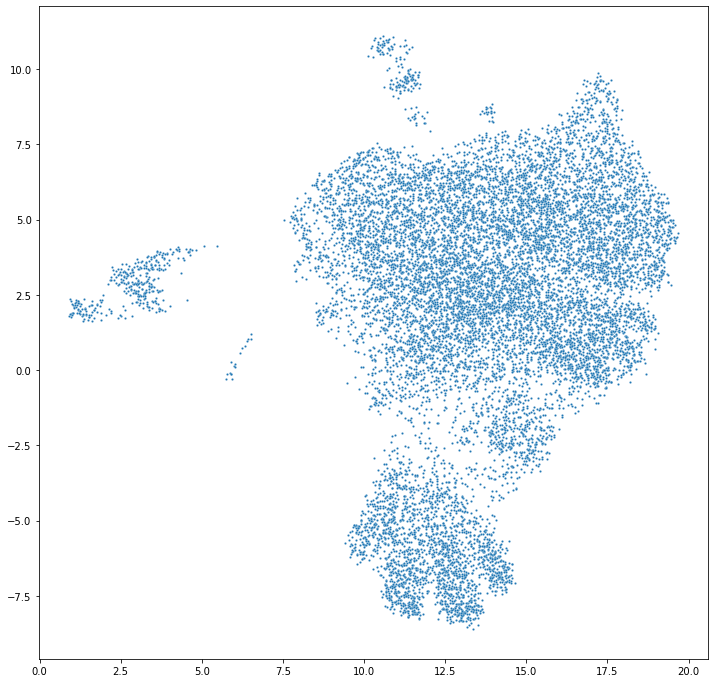

In [50]:
embedding = np.load('data/embedding_plot.npy')

fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(*embedding.T, s = 5, alpha = 1)
plt.show()

### Finding N-Clusters

In [51]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [52]:
# stores predicted clustering results
results=[]
kmeans_predictions = []

# iterates for a clustering range of k = 2 to 40
for k in range(2, 41):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(sd_pp)
    predict = kmeans.predict(sd_pp)
    result = {
        'k':k,
        'inertia': kmeans.inertia_,                      # get inertia score for each iteration of k
        'silhouette': silhouette_score(sd_pp, predict),  # get silhouette score
    }
    results.append(result)
    kmeans_predictions.append(predict)
    print(result, end='\r')
    
cluster_results = pd.DataFrame(results)

### Define cluster size

In [53]:
cluster_results.to_csv('data/cluster_results.csv')

In [54]:
cluster_results = pd.read_csv('data/cluster_results.csv', index_col= 0)

clusters = 5

### Plot Inertia

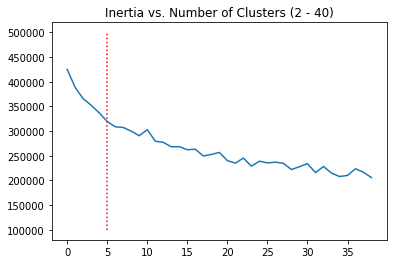

In [55]:
fig, ax = plt.subplots()
ax.set_title('Inertia vs. Number of Clusters (2 - 40)')
cluster_results.inertia.plot(ax=ax)
ax.vlines(x=clusters, ymin=100000, ymax=500000, colors='red', linestyles='dotted')
plt.show()

### Plot Silohouette Score

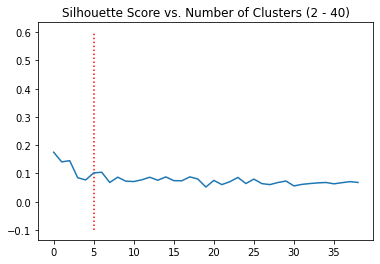

In [56]:
fig, ax = plt.subplots()
ax.set_title('Silhouette Score vs. Number of Clusters (2 - 40)')
cluster_results.silhouette.plot()
ax.vlines(x=clusters, ymin=-.1, ymax=.6, colors='red', linestyles='dotted')
plt.show()

Based on these plots to find the optimum of clusters, we can estimate that the number of clusters is approximately 6 based on the elbow plot above.

In [57]:
kmeans = MiniBatchKMeans(n_clusters = clusters, random_state = 42).fit(sd_pp)
kmeans

MiniBatchKMeans(n_clusters=5, random_state=42)

In [58]:
# labels for each cluster
pred_labels = np.unique(kmeans.predict(sd_pp))
pred_labels

array([0, 1, 2, 3, 4], dtype=int32)

In [59]:
# get prediction on sd_pp to get labels
sd_cluster_labels = pd.Series(kmeans.predict(sd_pp), index = sd_pp.index)

# convert predicted cluster labels to a list
cluster_list = sd_cluster_labels.values.tolist()

In [60]:
# insert cluster label to the sd_modeling df
sd_clustered = sd_modeling.copy()
sd_clustered.insert(1, 'cluster_label', cluster_list)

sd_clustered.head()

,id,cluster_label,latitude,longitude,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,33159143,2,32.91736,-117.07635,Scripps Ranch,92131,House,Private room,1,1.0,1.0,1,Real Bed,1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,within a few hours,100.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
1,17138468,3,32.84067,-117.27443,La Jolla,92037,Apartment,Entire home/apt,1,2.0,2.0,3,Real Bed,1400.0,1400.0,0.0,0.0,1.0,0.0,30.0,1125.0,no response,0.0,0.0,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
2,21898446,3,32.79797,-117.24250,Pacific Beach,92109,Townhouse,Private room,1,1.0,1.0,1,Real Bed,1250.0,1250.0,0.0,0.0,1.0,0.0,30.0,30.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,flexible,0.0,0.0
3,25948680,3,32.77545,-117.05923,College Area,92120,Apartment,Entire home/apt,1,1.0,1.0,1,Real Bed,1150.0,1150.0,0.0,0.0,1.0,0.0,31.0,40.0,no response,0.0,0.0,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,flexible,0.0,0.0
4,1756516,2,32.84619,-117.27558,La Jolla,92037,Condominium,Private room,1,1.0,1.0,1,Real Bed,110.0,110.0,200.0,0.0,1.0,50.0,180.0,365.0,within a day,67.0,0.0,6.0,1.0,1.0,2.0,4.0,90.0,7.0,7.0,8.0,8.0,9.0,10.0,0.0,0.0,0.0,strict_14_with_grace_period,0.0,0.0


In [61]:
# save as csv
path = "data/"

sd_clustered.to_csv(path + 'sd_clustered.csv')